In [30]:
import networkx as nx
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import csv

In [84]:
data = pd.read_csv('amazon-reviews.csv')
data.head()
print(type(data))
df = pd.DataFrame(data, columns = ['reviewerID', 'asin', 'Title', 'reviewerName', 'helpful', 'reviewText', 'overall', 'summary', 'unixReviewTime', 'reviewTime'])
df_s = df.head(51)

df_s.head()

header = ['from_node', 'to_node', 'weight']
data = []

<class 'pandas.core.frame.DataFrame'>


In [85]:
# unweighted graph first
SG = nx.Graph()

for i in range(len(df_s)-1):
    for j in range(len(df_s)-1):
        if i!=j and df_s['Title'][i] == df_s['Title'][j]:
            SG.add_edge(i,j)         

Name: 
Type: Graph
Number of nodes: 50
Number of edges: 446
Average degree:  17.8400


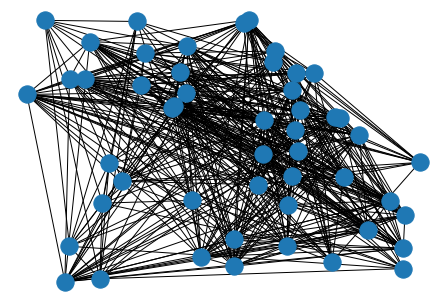

In [86]:
nx.draw_random(SG)
plt.savefig("small_network_path.jpg")

print(nx.info(SG))

Name: 
Type: Graph
Number of nodes: 50
Number of edges: 380
Average degree:  15.2000


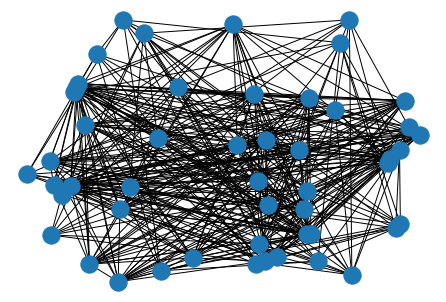

In [87]:
# link prediction

# remove edges from SG
sg_edge_subset = random.sample(SG.edges(), int(0.15 * SG.number_of_edges()))

SG_copy = SG.copy()
SG_copy.remove_edges_from(sg_edge_subset)

nx.draw_random(SG_copy)
print(nx.info(SG_copy))

In [88]:
# jaccard co-efficient

prediction_graph_list = list(nx.jaccard_coefficient(SG_copy))
zero = 0
refined_list = [item for item in prediction_graph_list if item[2] != zero]
refined_list[:5]

[(1, 3, 0.8888888888888888),
 (1, 7, 0.7777777777777778),
 (2, 6, 1.0),
 (4, 5, 0.8888888888888888),
 (4, 10, 0.8888888888888888)]

In [89]:
# first make weighted graph

SGW = nx.Graph()

for i in range(len(df_s)-1):
    for j in range(len(df_s)-1):
        if i!=j and df_s['Title'][i] == df_s['Title'][j]:
            SGW.add_edge(i,j,weight = (int)(df_s['overall'][i]+df_s['overall'][j])/2)

row_list = list(SGW.edges(data='weight'))

with open('export-graph.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(header)
    for row in row_list:
        writer.writerow(row)

Name: 
Type: Graph
Number of nodes: 50
Number of edges: 446
Average degree:  17.8400


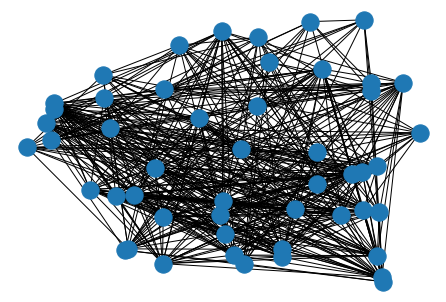

In [90]:
nx.draw_random(SGW)
print(nx.info(SGW))

In [91]:
# export nodes and weights here to export-graph.csv

data_test = pd.read_csv('export-graph.csv')
data_test.head()

,from_node,to_node,weight
0,0,1,3.5
1,0,2,4.0
2,0,3,3.0
3,0,4,3.0
4,0,5,4.0
